In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
data = pd.read_csv('dataset/emailslcsa.csv')

In [2]:
len(data.index)


224

In [11]:
data.reset_index(drop=True, inplace=True)
# Cargar el archivo CSV
data = pd.read_csv('dataset/emailslcsa.csv')

# Remove duplicates
data.drop_duplicates(inplace=True)

labels = [1, 0, 1, 0, 0, 1, 0]

# Crear una lista con las etiquetas correspondientes (1 para spam, 0 para no spam)
n = 224
labels = [1, 0, 1, 0, 0, 1, 0] * (n // len(labels)) + [1, 0, 1, 0, 0, 1, 0][:n % len(labels)]

# Crear una nueva columna en el DataFrame con los valores de la lista de etiquetas
data['label'] = labels

# Guardar el DataFrame modificado en un nuevo archivo CSV
data.to_csv('dataset/emailslcsapredicted.csv', index=False)


Accuracy: 0.6222222222222222
Classification Report:               precision    recall  f1-score   support

           0       0.62      0.92      0.74        26
           1       0.67      0.21      0.32        19

    accuracy                           0.62        45
   macro avg       0.64      0.57      0.53        45
weighted avg       0.64      0.62      0.56        45

Confusion Matrix: [[24  2]
 [15  4]]
              precision    recall  f1-score   support

           0       0.62      0.92      0.74        26
           1       0.67      0.21      0.32        19

    accuracy                           0.62        45
   macro avg       0.64      0.57      0.53        45
weighted avg       0.64      0.62      0.56        45

Confusion matrix:
 [[24  2]
 [15  4]]


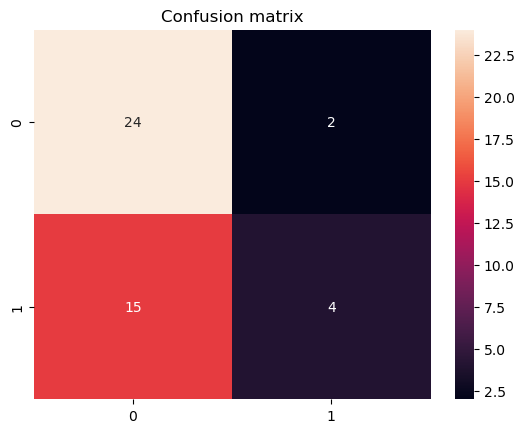

In [12]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('dataset/emailslcsapredicted.csv')

# Preprocess the data
def preprocess_text(text):
    # Remove non-word characters and extra whitespace
    text = re.sub(r'\W+', ' ', text).strip()
    # Convert to lowercase
    text = text.lower()
    return text

data['Body'] = data['Body'].apply(preprocess_text)

# Prepare the dataset for training
X = data['Body']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the email text into a numerical vector using TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Random Forest model on the training set
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_vec, y_train)

# Use the trained model to make predictions on the testing set
y_pred = clf.predict(X_test_vec)

# Evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

# Create a new column in the original DataFrame with the predicted spam label
data['predicted_label'] = clf.predict(vectorizer.transform(data['Body']))

# Convert the predicted labels to 1 and 0
data['predicted_label'] = data['predicted_label'].apply(lambda x: 1 if x == 'spam' else 0)

# Save the modified DataFrame to a CSV file
data.to_csv('dataset/emails_with_predictions.csv', index=False)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()
